In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_csv("data.csv")
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [3]:
df.shape

(50553, 12)

In [4]:
# raname Column
df.rename(columns={'Commision (in value)':'Commision'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision             50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [6]:
# Check null values
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Gender                  35953
Age                         0
dtype: int64

<b>Gender column has too many missing values and ID not usefull, so at this point, we delete this column.</b>

In [7]:
df.drop(["ID","Gender"],axis=1,inplace=True)

In [8]:
df.describe()

,Claim,Duration,Net Sales,Commision,Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


## Imbalace Data

In [9]:
print("Claimed")
print(df[df["Claim"] == 1]["Claim"].count())
print("Not Claimed")
print(df[df["Claim"] == 0]["Claim"].count())

Claimed
741
Not Claimed
49812


<b>Imbalanced dataset appears here. Oversample method will be performed to deal with imblancing problems. Before resampling, data visualization is executed first to know potential relationship.</b>

## Data Visualization

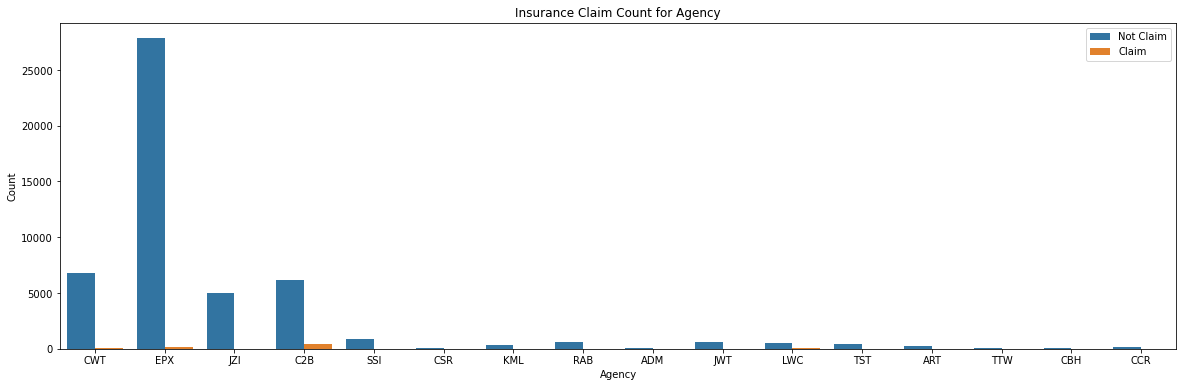

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='Agency',hue='Claim')
plt.title('Insurance Claim Count for Agency')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.legend([ "Not Claim","Claim"])
plt.show()

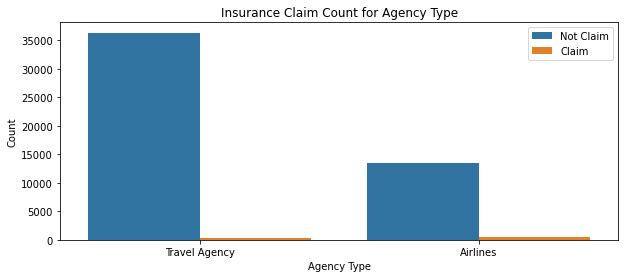

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Agency Type',hue='Claim')
plt.title('Insurance Claim Count for Agency Type')
plt.xlabel('Agency Type')
plt.ylabel('Count')
plt.legend([ "Not Claim","Claim"])
plt.show()

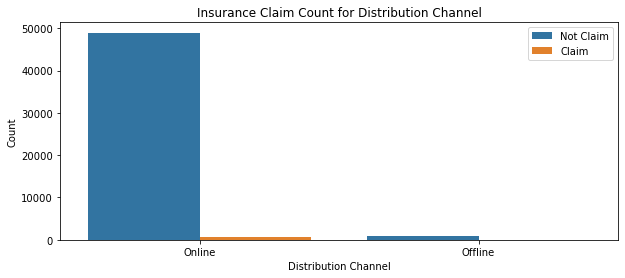

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Distribution Channel',hue='Claim')
plt.title('Insurance Claim Count for Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.legend([ "Not Claim","Claim"])
plt.show()

<b>Data for offline distribution channel is very less as campare to online that why we con not take futher. so we delete distribution channel column for now</b>

In [13]:
df.drop("Distribution Channel",axis=1,inplace=True)

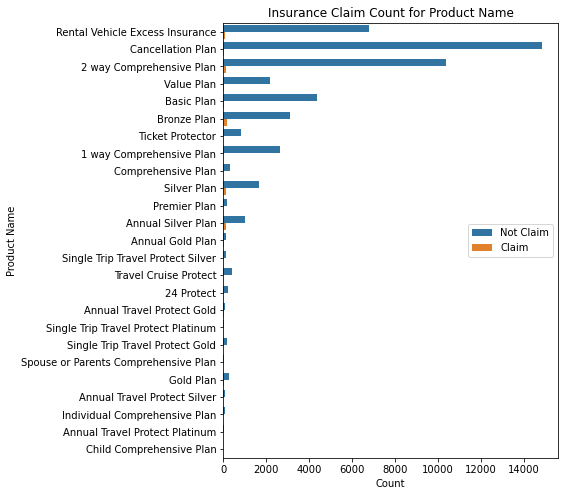

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(data=df,y='Product Name',hue='Claim')
plt.title('Insurance Claim Count for Product Name')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.legend([ "Not Claim","Claim"])
plt.show()

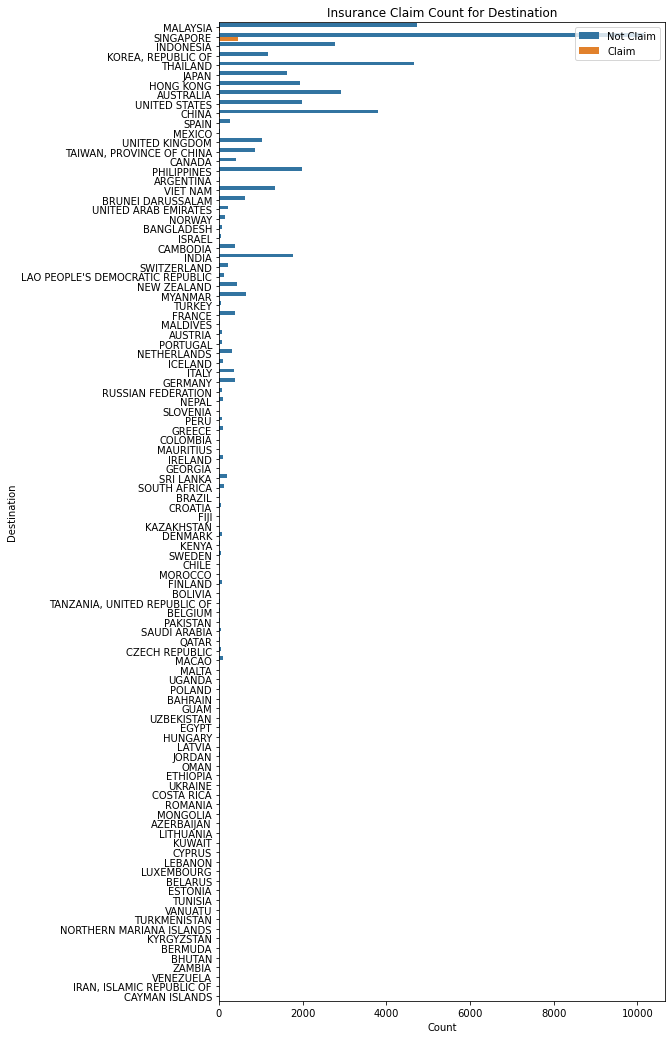

In [15]:
plt.figure(figsize=(8,18))
sns.countplot(data=df,y='Destination',hue='Claim')
plt.title('Insurance Claim Count for Destination')
plt.xlabel('Count')
plt.ylabel('Destination')
plt.legend([ "Not Claim","Claim"])
plt.show()

## Categorical Data Columns

In [16]:
df_cat = df.select_dtypes(object)

In [17]:
df_cat.head()

,Agency,Agency Type,Product Name,Destination
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Cancellation Plan,"KOREA, REPUBLIC OF"


In [18]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

,Agency,Agency Type,Product Name,Destination
0,6,1,16,56
1,7,1,10,79
2,6,1,16,56
3,7,1,1,38
4,7,1,10,47


## Numerical Data Column

In [20]:
df_num = df.select_dtypes(["int64","float64"]).drop("Claim",axis=1)

In [21]:
df_num.head()

,Duration,Net Sales,Commision,Age
0,7,0.0,17.82,31
1,85,69.0,0.00,36
2,11,19.8,11.88,75
3,16,20.0,0.00,32
4,10,15.0,0.00,29


## Clean Data

In [22]:
df_num.describe()

,Duration,Net Sales,Commision,Age
count,50553.000000,50553.000000,50553.00000,50553.000000
mean,49.425969,40.800977,9.83809,40.011236
std,101.434647,48.899683,19.91004,14.076566
min,-2.000000,-389.000000,0.00000,0.000000
25%,9.000000,18.000000,0.00000,35.000000
50%,22.000000,26.500000,0.00000,36.000000
75%,53.000000,48.000000,11.55000,44.000000
max,4881.000000,810.000000,283.50000,118.000000


In [23]:
df[df_num["Duration"] < 0]

,Agency,Agency Type,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
4063,JZI,Airlines,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [24]:
df["Age"] = df["Age"].replace(118,99)

<b>Some of data in some of columns are suspicious. If needed, we will transform the value of the data. Like Duration, negative values are strange. </b>

In [25]:
df[df["Destination"] == "BRUNEI DARUSSALAM"]["Duration"].mean()

22.8130081300813

In [26]:
df[df["Destination"] == "INDONESIA"]["Duration"].mean()

31.55276381909548

In [27]:
df[df["Destination"] == "BANGLADESH"]["Duration"].mean()

13.975903614457831

In [28]:
df_num.loc[4063,"Duration"] = 22.81
df_num.loc[38935,"Duration"] = 31.55
df_num.loc[48367,"Duration"] = 13.97

In [29]:
# lot of levels in destination
df.drop("Destination",axis=1,inplace=True)

## Taking care of skewness

Duration 22.87238687706864


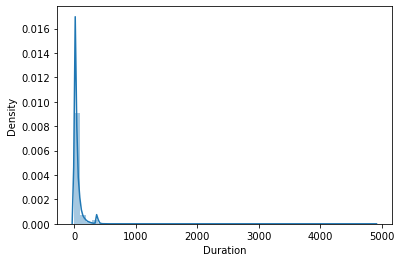

Net Sales 3.3281441910342053


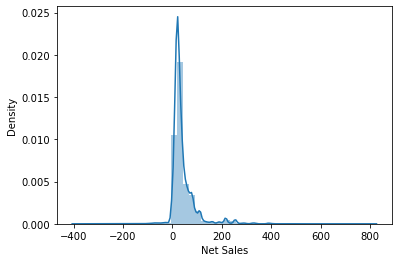

Commision 4.0780684356634636


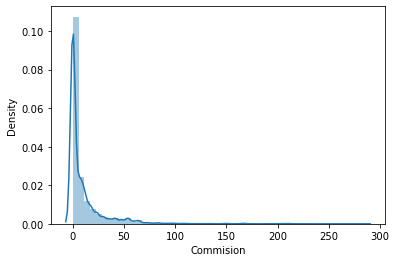

Age 2.9783898494112435


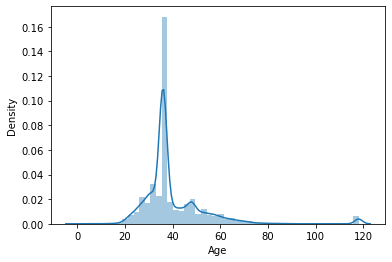

In [30]:
for col in df_num:
    print(col, skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

## Reducing Skewness

Duration 22.87238687706864


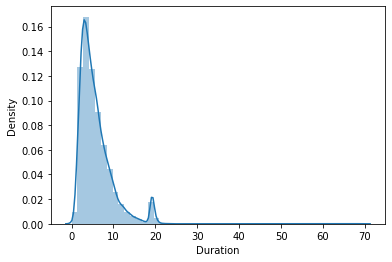

Commision 4.0780684356634636


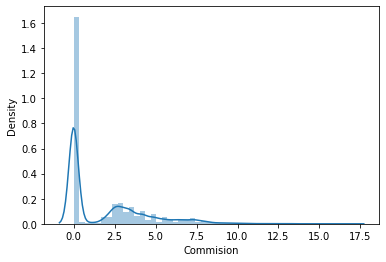

Age 2.9783898494112435


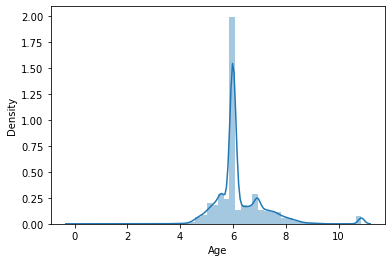

In [31]:
for col in df_num:
    
    if col != "Claim" and col != "Net Sales":
        print(col, skew(df_num[col]))
        df_num[col] = np.sqrt(df_num[col])
        plt.figure()
        sns.distplot(df_num[col])
        plt.show()

## Outlier

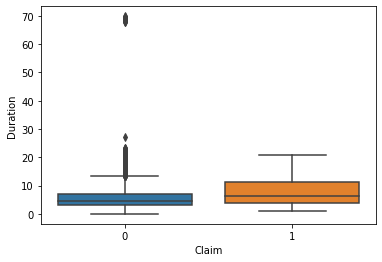

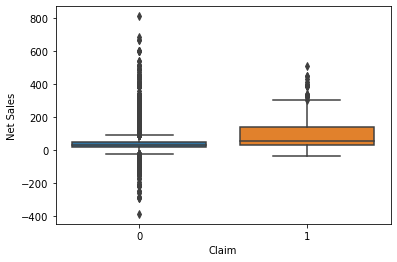

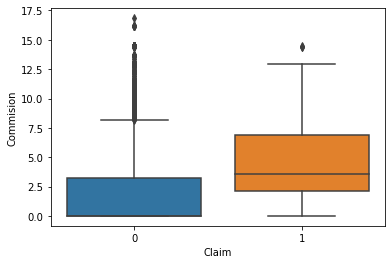

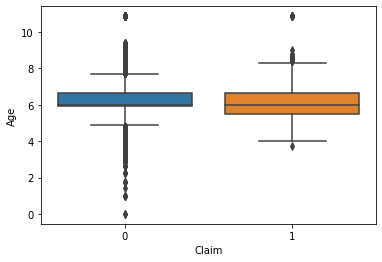

In [32]:
for col in df_num:
    plt.figure()
    sns.boxplot(df["Claim"],df_num[col])
    plt.show()

## Training Dataset and Testing Dataset

In [33]:
df_clean = pd.concat([df_cat,df_num],axis=1)

In [34]:
X = df_clean
y = df["Claim"]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
X_train.shape

(35387, 8)

In [54]:
y_train.shape

(35387,)

In [36]:
def create_model(model,X_train=X_train,y_train=y_train):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

## Baseline Model

In [37]:
lr = LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



LogisticRegression()

In [38]:
dt = DecisionTreeClassifier()
create_model(dt)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14961
           1       0.04      0.05      0.04       205

    accuracy                           0.97     15166
   macro avg       0.51      0.52      0.51     15166
weighted avg       0.97      0.97      0.97     15166



DecisionTreeClassifier()

## Standardization

In [39]:
for col in df_num:
    ss = StandardScaler()
    df_num[col] = ss.fit_transform(df_num[[col]])

In [40]:
df_clean = pd.concat([df_cat,df_num],axis=1)

In [41]:
df_clean.head()

,Agency,Agency Type,Product Name,Destination,Duration,Net Sales,Commision,Age
0,6,1,16,56,-0.786692,-0.834389,0.934099,-0.704119
1,7,1,10,79,0.859786,0.576677,-0.740905,-0.258444
2,6,1,16,56,-0.618665,-0.429475,0.626730,2.484523
3,7,1,1,38,-0.447506,-0.425385,-0.740905,-0.612259
4,7,1,10,47,-0.657323,-0.527636,-0.740905,-0.892396


In [42]:
X = df_clean
y = df["Claim"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Oversampling

In [43]:
ros = RandomOverSampler(random_state=1)

In [44]:
X_sample, y_sample = ros.fit_sample(X_train,y_train)

In [45]:
pd.Series(y_sample).value_counts()

1    34851
0    34851
Name: Claim, dtype: int64

In [46]:
lr1 = LogisticRegression()
create_model(lr1,X_sample,y_sample)

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14961
           1       0.05      0.63      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.73      0.50     15166
weighted avg       0.98      0.83      0.90     15166



LogisticRegression()

In [47]:
dt1 = DecisionTreeClassifier()
create_model(dt1,X_sample,y_sample)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14961
           1       0.04      0.05      0.04       205

    accuracy                           0.97     15166
   macro avg       0.51      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166



DecisionTreeClassifier()

In [48]:
rt =RandomForestClassifier(n_estimators=200,max_depth=10)
create_model(rt,X_sample,y_sample)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14961
           1       0.06      0.58      0.10       205

    accuracy                           0.86     15166
   macro avg       0.52      0.72      0.51     15166
weighted avg       0.98      0.86      0.91     15166



RandomForestClassifier(max_depth=10, n_estimators=200)

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=25)
create_model(gb,X_sample,y_sample)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14961
           1       0.05      0.04      0.05       205

    accuracy                           0.98     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.98      0.98     15166



GradientBoostingClassifier(max_depth=25)

## XGBoost / Xtreme Gradient Boosting

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb = XGBClassifier(n_estimators=200,reg_alpha=10)
create_model(xgb,X_sample,y_sample)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     14961
           1       0.07      0.27      0.11       205

    accuracy                           0.94     15166
   macro avg       0.53      0.61      0.54     15166
weighted avg       0.98      0.94      0.96     15166



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)